# Module 5 
## Continuation of last weeks analysis on the hospital patient dataset

Looking to identify potentially fraudulent treatment billings by apply K means clustering 

In [1]:
setwd("C:/Users/rdiml/Documents/")

In [2]:
install.packages("zipcode")
library(dplyr)
install.packages('DataExplorer')
library(DataExplorer)
#install.packages('xda')
#library(xda)
library(ggplot2)
install.packages('plotly')
library(plotly)
#library(data.table)
library(zipcode)
suppressPackageStartupMessages(library(tidyverse))
library(stringr)
library(ggthemes)
suppressPackageStartupMessages(library(maps))
library(tidyverse)
install.packages('maps')
library(maps)
install.packages('stringr')
library(stringr)
install.packages('reshape2')
library(reshape2)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'zipcode' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpCAFJbF\downloaded_packages



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpCAFJbF\downloaded_packages


Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'plotly' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpCAFJbF\downloaded_packages



Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'maps' is in use and will not be installed"Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'stringr' is in use and will not be installed"Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'reshape2' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'reshape2'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rdiml\Documents\R\win-library\3.6\00LOCK\reshape2\libs\x64\reshape2.dll to C:\Users\rdiml\Documents\R\win-library\3.6\reshape2\libs\x64\reshape2.dll: Permission denied"Warning message:
"restored 'reshape2'"


The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpCAFJbF\downloaded_packages



Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [41]:
install.packages("FNN")
library(FNN)
install.packages('factoextra')
library(factoextra)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'FNN' is in use and will not be installed"Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpCAFJbF\downloaded_packages


Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [3]:
med.data <- read.csv(file = "inpatientCharges.csv", )

In [4]:
head(med.data)
tail(med.data)

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,$16920.79,$6653.80,$5374.14


,DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments
163060,948 - SIGNS & SYMPTOMS W/O MCC,670024,NORTH CYPRESS MEDICAL CENTER,21214 NORTHWEST FREEWAY,CYPRESS,TX,77429,TX - Houston,23,$34774.21,$3772.00,$3085.73
163061,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,$26314.39,$3806.86,$3071.39
163062,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,$21704.72,$4027.36,$2649.72
163063,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,$39121.73,$5704.36,$4058.36
163064,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,$28873.09,$7663.09,$6848.54
163065,948 - SIGNS & SYMPTOMS W/O MCC,670068,TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND,4400 LONG PRAIRIE ROAD,FLOWER MOUND,TX,75028,TX - Dallas,12,$15042.00,$3539.75,$2887.41


In [5]:
summary(med.data)

                                                                  DRG.Definition  
 194 - SIMPLE PNEUMONIA & PLEURISY W CC                                  :  3023  
 690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                         :  2989  
 292 - HEART FAILURE & SHOCK W CC                                        :  2953  
 392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC            :  2950  
 641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC:  2899  
 871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                :  2812  
 (Other)                                                                 :145439  
  Provider.Id                       Provider.Name   
 Min.   : 10001   GOOD SAMARITAN HOSPITAL  :   633  
 1st Qu.:110092   ST JOSEPH MEDICAL CENTER :   427  
 Median :250007   MERCY MEDICAL CENTER     :   357  
 Mean   :255570   MERCY HOSPITAL           :   347  
 3rd Qu.:380075   ST JOSEPH HOSPITAL       :   343  
 Max.   :670077   

Data Dictionary:
- DRG.Definition classification system for similar medical conditions and/or any inpatient services 
- Total discharges is the total number of discharges billed by all providers for inpatient hospital services
- AVG covered costs is the average charge of all provider's services covered by Medicare for discharges in the DRG. These will vary from hospital to hospital because of differences in hospital charge structures
- AVG total payments is the average total payments to all providers for the DRG including the MS-DRG amount, teaching,  disproportionate share, capital, and outlier payments for all cases. Also included in average total payments are co-payment and deductible amounts that the patient is responsible for and any additional payments by third parties for coordination of benefits.
- AVG medicare payments is the average amount that Medicare pays to the provider for Medicare's share of the MS-DRG. Medicare payment amounts include the MS-DRG amount, teaching,  disproportionate share, capital, and outlier payments for all cases. Medicare payments DO NOT include beneficiary co-payments and deductible amounts nor any additional payments from third parties for coordination of benefits

In [6]:
introduce(med.data)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
163065,12,9,3,0,0,163065,1956780,41593032


In [7]:
med.data %>% group_by(DRG.Definition) %>% summarise(ct = n()) %>% arrange(desc(ct))

DRG.Definition,ct
194 - SIMPLE PNEUMONIA & PLEURISY W CC,3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,2989
292 - HEART FAILURE & SHOCK W CC,2953
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",2950
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",2899
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,2812
603 - CELLULITIS W/O MCC,2807
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,2750
191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,2720
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,2713


In [8]:
#which states have the most claims:
med.data %>% group_by(Provider.State) %>% summarise(ct = n()) %>% arrange(desc(ct))

Provider.State,ct
CA,13064
TX,11864
FL,11155
NY,9178
IL,7909
PA,7804
OH,7012
MI,5419
NC,5041
GA,4968


In [7]:
drop.dollar.sign <- function(x) {
    as.numeric(str_replace(x, '\\$', ''))
}

In [8]:
med.data %>% mutate_at(vars(Average.Covered.Charges, Average.Total.Payments,Average.Medicare.Payments), drop.dollar.sign)

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,16920.79,6653.80,5374.14
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,11977.13,5834.74,4761.41
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,35841.09,8031.12,5858.50
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,28523.39,6113.38,5228.40
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,75233.38,5541.05,4386.94


In [20]:
#need to convert class type of numeric columns
med.data$Average.Medicare.Payments <- as.numeric(med.data$Average.Medicare.Payments)
class(med.data$Average.Medicare.Payments)
med.data$Average.Covered.Charges <- as.numeric(med.data$Average.Covered.Charges)
class(med.data$Average.Covered.Charges)
med.data$Average.Total.Payments <- as.numeric(med.data$Average.Total.Payments)
class(med.data$Average.Total.Payments)

[1] "numeric"

[1] "numeric"

[1] "numeric"

In [22]:
drg.cost.state <- med.data %>%
group_by(DRG.Definition, Provider.State) %>%
summarise(mean.total.discharges = mean(Total.Discharges), 
         mean.avg.covered.charges = mean(Average.Covered.Charges), 
         mean.avg.total.payments = mean(Average.Total.Payments),
         mean.avg.medicare.payments = mean(Average.Medicare.Payments), 
         mean.count.trans = n()
         )
head(drg.cost.state)

DRG.Definition,Provider.State,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,mean.count.trans
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK,23.00000,101884.00,133707.00,115827.00,1
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,38.21739,83031.39,92878.43,83129.87,23
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AR,40.75000,67597.19,98847.31,88489.81,16
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AZ,25.25000,93283.00,105106.08,105568.25,24
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA,25.59701,118402.94,110818.22,112796.64,67
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CO,25.50000,97690.20,115112.50,98502.60,10


I re-created the example from the professor's upload below. And then I proceeded to compare the mean.avg.total.payments to the Average.total.payments to see how much higher or lower a provider is charging per treatment compared to other providers in the state and I am calling it diff.to.mean. 

In [23]:
by.provider <- med.data %>%
left_join(drg.cost.state, by=c("DRG.Definition", "Provider.State")) %>%
mutate(ratio.total.discharges = Total.Discharges/mean.total.discharges, 
       ratio.avg.covered.charges = Average.Covered.Charges/mean.avg.covered.charges,
       ratio.avg.total.payments = Average.Total.Payments/mean.avg.total.payments,
       ratio.avg.medicare.payments = Average.Medicare.Payments/mean.avg.medicare.payments,
       diff.to.mean = Average.Total.Payments/mean.avg.total.payments)%>%
       arrange(DRG.Definition, Provider.State)
head(by.provider)

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,...,mean.total.discharges,mean.avg.covered.charges,mean.avg.total.payments,mean.avg.medicare.payments,mean.count.trans,ratio.total.discharges,ratio.avg.covered.charges,ratio.avg.total.payments,ratio.avg.medicare.payments,diff.to.mean
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,20017,ALASKA REGIONAL HOSPITAL,2801 DEBARR ROAD,ANCHORAGE,AK,99508,AK - Anchorage,23,101884,...,23.00000,101884.00,133707.00,115827.00,1,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,97796,...,38.21739,83031.39,92878.43,83129.87,23,2.3811149,1.1778196,1.0113220,1.0411180,1.0113220
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,29994,...,38.21739,83031.39,92878.43,83129.87,23,0.3663254,0.3612369,1.0135937,1.0927360,1.0135937
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,107397,...,38.21739,83031.39,92878.43,83129.87,23,0.6279863,1.2934506,0.9397661,0.9656457,0.9397661
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,23460,...,38.21739,83031.39,92878.43,83129.87,23,0.6541524,0.2825437,0.9361484,0.8872142,0.9361484
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,94605,...,38.21739,83031.39,92878.43,83129.87,23,0.4709898,1.1393884,0.9863000,1.0625784,0.9863000


In [33]:
install.packages("normalr")
library(normalr)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'normalr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpCAFJbF\downloaded_packages


Creating a subset of variables from the dataset to contain mostly continuous variables so that I can get ready for normalizing the data prior to the k-means clustering steps later on. I am doing so by using the scale function, I initially wanted to begin with the normalize() function but I couldn't get it to work for this example unfortunately.

In [51]:
by.provider.subset <- subset(by.provider, select = (c(ratio.total.discharges,
                            ratio.avg.covered.charges,
                            ratio.avg.total.payments,
                            ratio.avg.medicare.payments,
                            Total.Discharges, 
                            Average.Covered.Charges,
                            Average.Medicare.Payments,
                            Average.Total.Payments,
                            mean.total.discharges,
                            mean.avg.covered.charges,
                            mean.avg.total.payments,
                            mean.avg.medicare.payments,
                            mean.count.trans,
                            diff.to.mean, 
                            Provider.Zip.Code,
                            Provider.Id)))

by.provider.subset.scaled <- scale(by.provider.subset) #, method = "standardize")

In [69]:
install.packages('qgraph')
library(qgraph)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'checkmate', 'mnormt', 'pbivnorm', 'Formula', 'latticeExtra', 'acepack', 'htmlTable', 'rjson', 'psych', 'lavaan', 'Hmisc', 'jpeg', 'glasso', 'huge', 'fdrtool', 'd3Network', 'ggm', 'BDgraph', 'pbapply'



package 'checkmate' successfully unpacked and MD5 sums checked
package 'mnormt' successfully unpacked and MD5 sums checked
package 'pbivnorm' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'acepack' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'rjson' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked
package 'lavaan' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'glasso' successfully unpacked and MD5 sums checked
package 'huge' successfully unpacked and MD5 sums checked
package 'fdrtool' successfully unpacked and MD5 sums checked
package 'd3Network' successfully unpacked and MD5 sums checked
package 'ggm' successfully 

Registered S3 methods overwritten by 'huge':
  method    from   
  plot.sim  BDgraph
  print.sim BDgraph


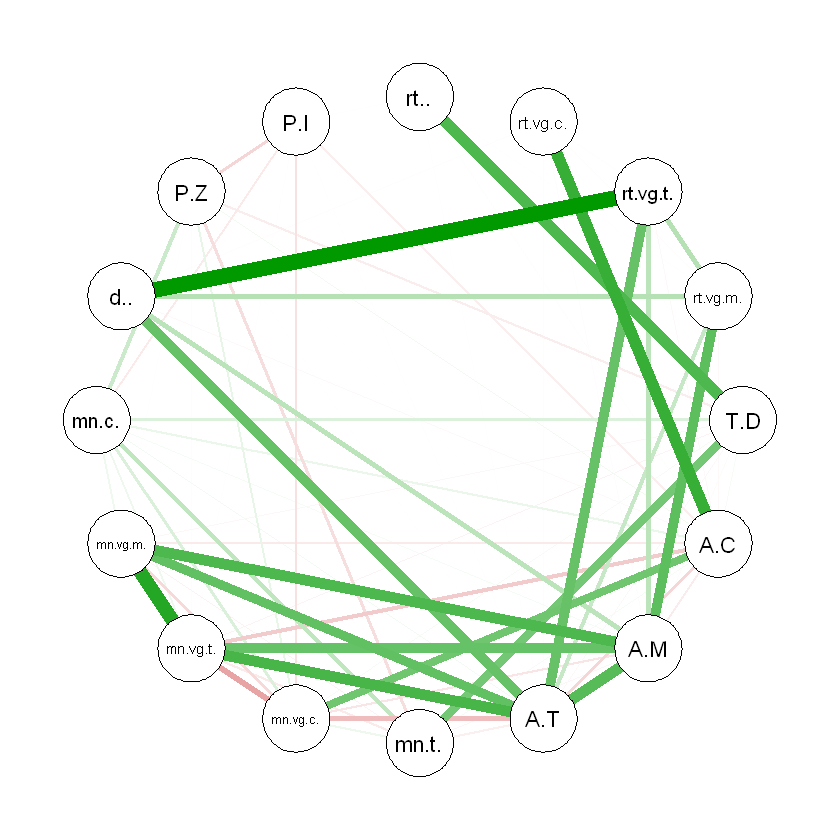

In [70]:
qgraph(cor(by.provider.subset.scaled))

In [72]:
install.packages('psych')
library(psych)

Installing package into 'C:/Users/rdiml/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rdiml\AppData\Local\Temp\RtmpCAFJbF\downloaded_packages



Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha



In [75]:
pc <- principal(by.provider.subset.scaled, nfactors= 5, rotate = "none" )
pc

Warning message in cor.smooth(r):
"Matrix was not positive definite, smoothing was done"Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
"pnchisq(x=3.89823e+06, ..): not converged in 1000000 iter."Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
"pnchisq(x=3.89823e+06, ..): not converged in 1000000 iter."Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
"pnchisq(x=3.89823e+06, ..): not converged in 1000000 iter."Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
"pnchisq(x=3.89823e+06, ..): not converged in 1000000 iter."Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
"pnchisq(x=3.89823e+06, ..): not converged in 1000000 iter."Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
"pnchisq(x=3.89823e+06, ..): not converged in 1000000 iter."Warning message in pchisq(df = result$dof, ncp = x, q = result$STATISTIC):
"pnchisq(x=3.89823e+06, ..)

Principal Components Analysis
Call: principal(r = by.provider.subset.scaled, nfactors = 5, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
                              PC1   PC2   PC3   PC4   PC5   h2    u2 com
ratio.total.discharges      -0.02  0.16  0.62 -0.32 -0.18 0.55 0.455 1.8
ratio.avg.covered.charges   -0.10  0.32  0.19  0.68 -0.44 0.81 0.193 2.4
ratio.avg.total.payments     0.56  0.69 -0.30 -0.24 -0.04 0.93 0.068 2.6
ratio.avg.medicare.payments  0.41  0.34 -0.09 -0.04  0.05 0.29 0.707 2.1
Total.Discharges            -0.07  0.26  0.82 -0.41 -0.08 0.92 0.077 1.7
Average.Covered.Charges     -0.28  0.52  0.21  0.74 -0.19 0.98 0.023 2.5
Average.Medicare.Payments    0.83  0.00  0.15  0.19  0.05 0.75 0.249 1.2
Average.Total.Payments       0.93  0.09  0.02  0.03 -0.03 0.87 0.129 1.0
mean.total.discharges       -0.09  0.23  0.54 -0.26  0.10 0.43 0.568 2.0
mean.avg.covered.charges    -0.33  0.46  0.07  0.32  0.29 0.51 0.487 3.5
mean.avg.total.payme

In [ ]:
install.packages('')
library()

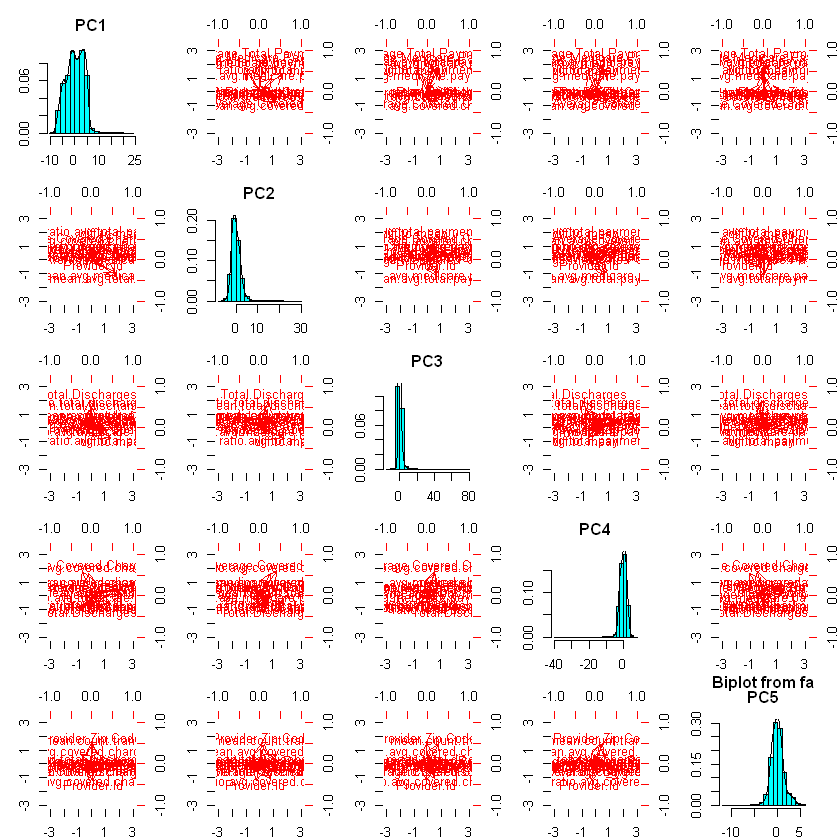

In [77]:
biplot(pc, labels = rownames(by.provider.subset.scaled), cex = 0.5, col=c("white", "red"))

In [52]:
#creating k clusters 
k2 <- kmeans(by.provider.subset, centers = 2, nstart = 10)
k3 <- kmeans(by.provider.subset, centers = 3, nstart = 10)
k4 <- kmeans(by.provider.subset, centers = 4, nstart = 10)
k5 <- kmeans(by.provider.subset, centers = 5, nstart = 10)
k6 <- kmeans(by.provider.subset, centers = 6, nstart = 10)
k7 <- kmeans(by.provider.subset, centers = 7, nstart = 10)
k8 <- kmeans(by.provider.subset, centers = 8, nstart = 10)
k9 <- kmeans(by.provider.subset, centers = 9, nstart = 10)
k10 <- kmeans(by.provider.subset, centers = 10, nstart = 10)
k11 <- kmeans(by.provider.subset, centers = 11, nstart = 10)
k12 <- kmeans(by.provider.subset, centers = 12, nstart = 10)
k13 <- kmeans(by.provider.subset, centers = 13, nstart = 10)
k14 <- kmeans(by.provider.subset, centers = 14, nstart = 10)
k15 <- kmeans(by.provider.subset, centers = 15, nstart = 10)

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 8153250)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 8153250)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 8153250)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 8153250)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 8153250)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 8153250)"Warning message:
"did not converge in 10 iterations"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 8153250)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 8153250)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 8153250)"

In [53]:
p1 <- fviz_cluster(k2, geom = "point", data = by.provider.subset) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point", data = by.provider.subset) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, goem = "point", data = by.provider.subset) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point", data = by.provider.subset) + ggtitle("k = 5")
p5 <- fviz_cluster(k6, geom = "point", data = by.provider.subset) + ggtitle("k = 6")
p6 <- fviz_cluster(k7, geom = "point", data = by.provider.subset) + ggtitle("k = 7")
p7 <- fviz_cluster(k8, geom = "point", data = by.provider.subset) + ggtitle("k = 8")
p8 <- fviz_cluster(k9, geom = "point", data = by.provider.subset) + ggtitle("k = 9")
p9 <- fviz_cluster(k10, geom = "point", data = by.provider.subset) + ggtitle("k = 10")
p10 <- fviz_cluster(k11, geom = "point", data = by.provider.subset) + ggtitle("k = 11")
p11 <- fviz_cluster(k12, geom = "point", data = by.provider.subset) + ggtitle("k = 12")
p12 <- fviz_cluster(k13, geom = "point", data = by.provider.subset) + ggtitle("k = 13")
p13 <- fviz_cluster(k14, geom = "point", data = by.provider.subset) + ggtitle("k = 14")
p14 <- fviz_cluster(k15, geom = "point", data = by.provider.subset) + ggtitle("k = 15")

In [ ]:
install.packages("gridExtra")
library(gridExtra)
grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, nrow = 3)

In [68]:
#this one has 4011 entries in its lowest 
k13

K-means clustering with 13 clusters of sizes 11241, 12161, 12593, 4011, 16318, 16780, 13105, 11845, 11992, 16716, 12482, 15416, 8405

Cluster means:
   ratio.total.discharges ratio.avg.covered.charges ratio.avg.total.payments
1               1.0001898                 0.6794370                0.9523169
2               0.9965762                 1.0286203                1.2003860
3               0.9982453                 1.3719579                0.7771132
4               1.0241126                 1.0385082                0.2188060
5               1.0213928                 1.0994840                1.2735787
6               1.0073155                 0.6467014                0.9599958
7               0.9720299                 0.5264391                0.8914274
8               0.9945554                 1.3127078                0.8330486
9               0.9698828                 1.3343851                0.8595441
10              0.9974441                 1.1340099                1.2436767
11  

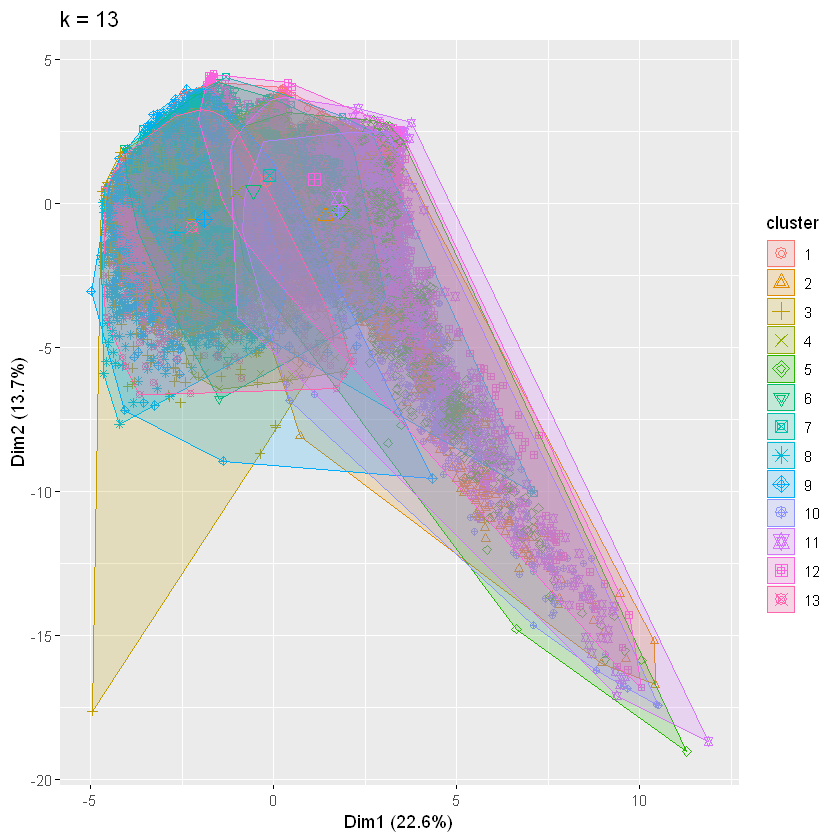

In [65]:
p12

K-means clustering with 14 clusters of sizes 3991, 14697, 6256, 10914, 8394, 11680, 13204, 9407, 13782, 10737, 21194, 12720, 11624, 14465

Cluster means:
   ratio.total.discharges ratio.avg.covered.charges ratio.avg.total.payments
1               1.0243852                 1.0450605                0.2191676
2               1.0005822                 1.0810646                1.2452091
3               1.0058111                 0.5834609                0.9468955
4               0.9993285                 1.0494451                1.2288715
5               0.9919268                 1.3388339                0.8088758
6               0.9965791                 0.6684678                0.9514861
7               1.0178346                 0.6429510                1.0281286
8               0.9764479                 1.4173107                1.2101664
9               1.0041909                 0.7059881                0.9584580
10              0.9752382                 1.2904157                0.8607568

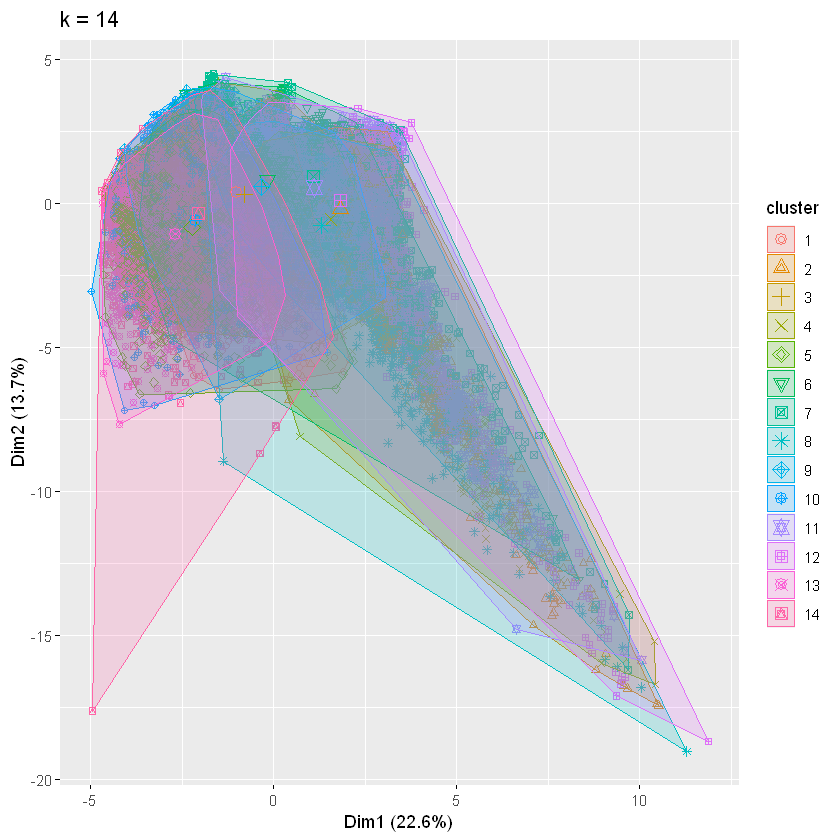

In [66]:
#has a cluster with 3991 entries, with a second lowest one of 6256; same as k12
k14
p13

Conclusions:
- I am comfortable picking a value of k where it is equal to 14 because it is the smallest cluster attainable in this one and has 3991 observations in it. I am comfortable with this number of observations in this group of providers because it is only equal to about 2.44% of the total observations which is acceptable number based on associated readings 